### Step 1: Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Step 2: Load and prepare the data

In [2]:
# Load the Titanic dataset
# url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv("titanic.csv")

print(data.head())
# Preprocess the data
# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Convert categorical features to numerical
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Select features and target variable
features = ['Pclass', 'Sex', 'Age', 'Embarked']
X = data[features].values
y = data['Survived'].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add a bias term (intercept) to X
X = np.c_[np.ones(X.shape[0]), X]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


### Step 3: Implement the gradient descent function with plotting

In [5]:
def gradient_descent(X, y, learning_rate=0.01, n_iterations=100):
    m, n = X.shape            # m is the number of training examples, n is the number of features
    theta = np.zeros(n)        # Initialize the parameters (weights) to zero for all features
    
    # Store values for plotting
    history = {"iterations": [], "error": [], "slope": []}
    
    for i in range(n_iterations):   # Loop for the number of iterations we want to perform
        predictions = X.dot(theta)  # Calculate predictions by multiplying input features with weights
        errors = predictions - y    # Calculate the difference between predictions and actual values (errors)
        gradients = (2/m) * X.T.dot(errors)  # Compute the gradient (slope) for each parameter
        theta = theta - learning_rate * gradients  # Update parameters in the opposite direction of the gradient
        
        # Save data for plotting
        history["iterations"].append(i)
        history["error"].append(np.mean(errors**2))  # Mean squared error
        history["slope"].append(np.mean(gradients))  # Average slope
    
    return theta, history  # Return the final optimized weights after all iterations and history for plotting

### Step 4: Custom plot function

In [6]:
def plot_gradient_descent(history):
    iterations = history["iterations"]
    errors = history["error"]
    slopes = history["slope"]
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot the error vs. iterations
    ax[0].plot(iterations, errors, 'r-', label='Error')
    ax[0].set_xlabel('Iterations')
    ax[0].set_ylabel('Mean Squared Error')
    ax[0].set_title('Error vs. Iterations')
    ax[0].legend()
    
    # Plot the slope vs. iterations
    ax[1].plot(iterations, slopes, 'b-', label='Slope')
    ax[1].set_xlabel('Iterations')
    ax[1].set_ylabel('Average Slope')
    ax[1].set_title('Slope vs. Iterations')
    ax[1].legend()
    
    plt.tight_layout()
    plt.show()

### Step 5: Train the model and plot results

Learned parameters: [ 0.38484036 -0.13868258  0.23920243 -0.04921973 -0.03699233]


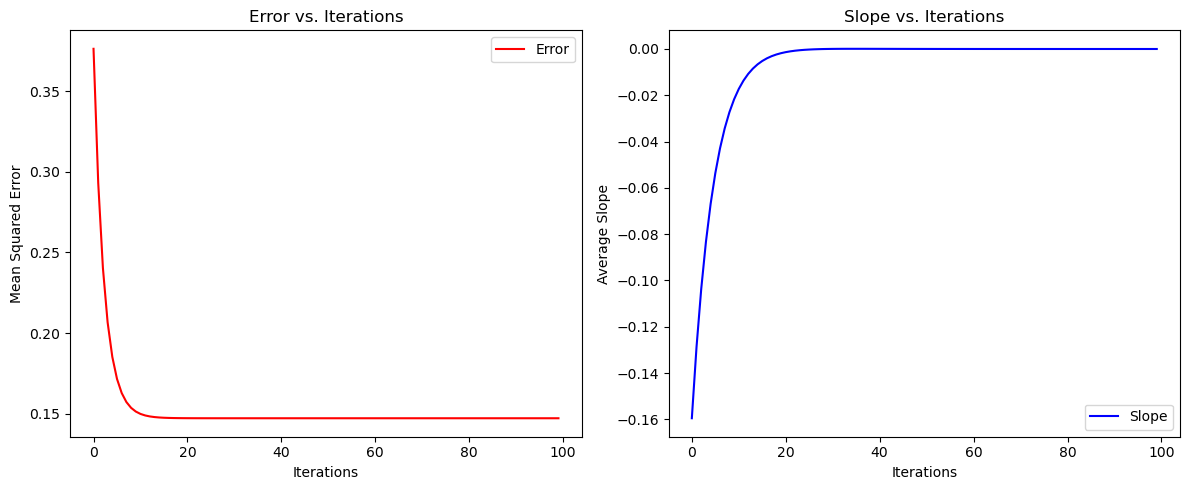

In [9]:
# Train the model using gradient descent
theta, history = gradient_descent(X_train, y_train, learning_rate=0.1, n_iterations=100)

# Print the learned parameters
print("Learned parameters:", theta)

# Plot the error and slope during gradient descent
plot_gradient_descent(history)

The plots generated in Step 5 of the code help us visualize how the gradient descent algorithm is performing over time. Here’s a simple explanation of each plot:

### 1. Error vs. Iterations

**What It Shows:**

    This plot shows how the mean squared error (MSE) changes as the number of iterations increases during the gradient descent process.

**What the Plot Tells Us:**

    
    X-Axis: Number of iterations (how many times the algorithm has updated the weights).
    Y-Axis: Mean squared error (a measure of how far off our predictions are from the actual values).

**How to Read It:**

    Decreasing Error: Ideally, you want to see the error decrease as the iterations progress. This means the model is learning and improving its predictions.
    Flat or Increasing Error: If the error does not decrease or increases, it might indicate issues such as a high learning rate, insufficient iterations, or problems with the model.

**2. Slope vs. Iterations**

**What It Shows:**

    This plot shows how the average gradient (slope) of the error function changes as the number of iterations increases.

**What the Plot Tells Us:**

    X-Axis: Number of iterations.
    Y-Axis: Average slope of the gradients used to update the weights.

**How to Read It:**

    Decreasing Slope: Typically, you want to see the average slope decrease over time. A decreasing slope indicates that the model is making smaller updates to the weights as it approaches the optimal solution.
    Flat Slope: If the slope levels off, it suggests that the model's weights are stabilizing and the gradient descent process is converging.

**Summary:**

    Error vs. Iterations: Helps you see if your model's predictions are improving over time. You want this line to go down, showing that the model's predictions are getting closer to the actual values.
    Slope vs. Iterations: Indicates how the adjustments to the model's parameters (weights) are changing. You want this line to go down, indicating that the model is making smaller, more refined updates as it gets closer to the best solution.

By examining these plots, you can get a visual understanding of whether the gradient descent algorithm is working correctly and how well the model is learning from the data.

### Step 6: Make predictions and evaluate the model

In [10]:
def predict(X, theta):
    return X.dot(theta)

# Predict on the test set
y_pred = predict(X_test, theta)

# Convert predictions to binary outcomes (0 or 1) based on a threshold of 0.5
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.7821229050279329


### Explanation:

    Data Preparation:
        Missing Values: We fill missing values in Age and Embarked with median and mode respectively.
        Categorical to Numerical: Convert categorical variables to numerical format for the model.
        Normalization: Normalize features for better gradient descent performance.
        Split Data: Split into training and testing sets.

    Gradient Descent Function:
        Error and Gradient Computation: Calculate prediction errors and gradients.
        Update Weights: Adjust weights based on gradients and learning rate.

    Plot Function:
        Error vs. Iterations: Shows how error decreases over iterations.
        Slope vs. Iterations: Shows how the average slope of gradients changes.

    Model Training and Evaluation:
        Train the Model: Use gradient descent to learn weights.
        Make Predictions: Predict outcomes on the test set and convert to binary.
        Evaluate: Calculate accuracy to measure the model's performance.

### The role of Learning Rate (LR) in Gradient Descent algorithm explained

The LR is a critical hyperparameter that determines the step-size at each iteration while moving towards a minimum loss function. 

The best learning rate can vary depending on the problem, the model, and the dataset you're working with. However, I can explain the differences between a larger learning rate like 0.1 and a smaller one like 0.001 using a simple example.
Understanding Learning Rate

The learning rate determines the size of the steps taken towards minimizing the loss function during training.

    Large Learning Rate (e.g., 0.1):
        Pros: It makes larger updates to the weights, allowing the model to converge faster.
        Cons: If it's too large, the steps might overshoot the minimum of the loss function, causing the training to be unstable or to diverge (not converge at all).

    Small Learning Rate (e.g., 0.001):
        Pros: It makes smaller updates, leading to more precise adjustments towards the minimum, which can help achieve a better final result.
        Cons: Training can be very slow and might get stuck in local minima instead of reaching the global minimum.

Conclusion

    Use 0.1 if you want faster convergence and the problem isn't too sensitive to overshooting (e.g., you're confident the loss surface is smooth and doesn't have sharp minima).
    Use 0.001 when you're dealing with a more complex or sensitive loss surface where careful, precise adjustments are needed, and you want to ensure stable convergence.

In practice, it's common to start with a moderate learning rate and then adjust based on how the training is going.